### Aqui colocarei apenas os códigos das questões, e partes de questões, que os alunos tiveram dificuldade.

# Lista 2 parte 2 (apenas questão 4)

In [1]:
import pymp
import numpy as np
import pandas as pd
import time
import multiprocessing as mp
from matplotlib import pyplot as plt
from ipywidgets import interact

## a)

In [82]:
df = pd.read_csv('diagrama_de_Hubble.csv')
df

,GALAXY NAME,DISTANCE (MPc),VELOCITY (k/sec)
0,NGC0055,2.0,94
1,NGC0247,4.1,176
2,UGC00685,6.0,271
3,UGC002888,6.7,374
4,M74,7.2,753
5,NGC0045,8.0,493
6,NGC0578,18.5,1616
7,NGC0063,18.7,1303
8,NGC2293,19.0,1782
9,NGC074,19.5,1811


## b)

In [83]:
df2 = np.genfromtxt('diagrama_de_Hubble.csv',delimiter=",",skip_header=1)[:,1:3]
df2

array([[2.000e+00, 9.400e+01],
       [4.100e+00, 1.760e+02],
       [6.000e+00, 2.710e+02],
       [6.700e+00, 3.740e+02],
       [7.200e+00, 7.530e+02],
       [8.000e+00, 4.930e+02],
       [1.850e+01, 1.616e+03],
       [1.870e+01, 1.303e+03],
       [1.900e+01, 1.782e+03],
       [1.950e+01, 1.811e+03],
       [2.080e+01, 1.923e+03],
       [2.500e+01, 2.509e+03],
       [2.740e+01, 1.611e+03],
       [2.930e+01, 2.408e+03],
       [3.440e+01, 2.568e+03],
       [3.740e+01, 3.238e+03],
       [3.920e+01, 3.822e+03],
       [3.940e+01, 2.629e+03],
       [4.070e+01, 2.308e+03],
       [4.800e+01, 3.969e+03]])

## c)

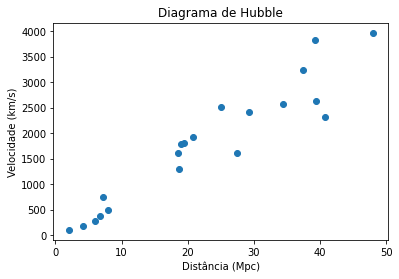

In [8]:
plt.scatter(df['DISTANCE (MPc)'],df['VELOCITY (k/sec)'])
plt.title('Diagrama de Hubble')
plt.xlabel('Distância (Mpc)')
plt.ylabel('Velocidade (km/s)')
plt.show()

## d) Há muitas forma de se fazer, vou colocar aqui de uma forma simples

In [84]:
def mmq_reta(observado_y,observado_x,val_inicial,val_final,passos,tolerancia):
    iteracao = 0 # para contar quantas iterações fizemos
    while (2*abs((val_inicial-val_final)/(val_inicial+val_final)) > tolerancia):
        mmq_array = np.zeros(passos) # pré-aloca o espaço para os valores do mmq
        a_range = np.linspace(val_inicial,val_final,passos) # gerando valores de teste para o coeficiente
        for i in range(passos):
            mmq_array[i] = np.sum((observado_y-a_range[i]*observado_x)**2) # calculando os quadrados dos erros para cada teste do coeficiente
        idx_min = np.argmin(mmq_array) # encontrando a posição do mínimo
        val_inicial,ajuste,val_final = a_range[idx_min-1:idx_min+2] # pegando o valor mínimo e seus vizinhos - atualiza para a prox. iteração
        print('best fit - iter: '+str(iteracao)+' = ', ajuste)
        iteracao += 1
    return ajuste

# valores a serem aplicados:
x = df2[:,0] # observado
y = df2[:,1] # observado
val_final = 100 # chute do máximo
val_inicial = 10 # chute do mínimo
passos = 10 # numero de passos por iteração
tolerancia = 0.002 # tolerância da variação entre iterações

h0 = mmq_reta(y,x,val_inicial,val_final,passos,tolerancia)


best fit - iter: 0 =  80.0
best fit - iter: 1 =  78.88888888888889
best fit - iter: 2 =  79.13580246913581
best fit - iter: 3 =  79.08093278463649
best fit - iter: 4 =  79.04435299497028


# 5) - Soluções da Laíza e Theo

In [ ]:
with open('realtime.py', 'w') as pyfile:
    print("""import argparse

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

parser = argparse.ArgumentParser(description='Código que recebe coordenadas do observador(latitude, longitude e altitude) e o nome de um objeto e retorna as coordenadas no tempo atual.')

parser.add_argument('-lat', '--latitude', type=float, help='Latitude do observador')
parser.add_argument('-lon', '--longitude', type=float, help='Longitude do observador')
parser.add_argument('-alt', '--altitude', type=int, help='Altitude do observador')
parser.add_argument('-obj', '--objeto', type=str, help='Nome do objeto')

obj = SkyCoord.from_name(args.objeto)
coords = EarthLocation(lat=args.latitude*u.deg, lon=args.longitude*u.deg, height=args.altitude*u.m)
agora = Time.now()
obj_aa = obj.transform_to(AltAz(location=coords, obstime=agora))

print(f'''Localização do Observador: ({args.latitude}, {args.longitude}, {args.altitude})
Objeto: {args.objeto}
Coordenadas
Altazimutais: ({obj_aa.az}, {obj_aa.alt})
Equatoriais: ({obj.ra}, {obj.dec})
''')""", file=pyfile)

## uma variação (a ser salva em um arquivo .py separado)

In [ ]:
#!/usr/bin/env python3

import argparse
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

parser = argparse.ArgumentParser(description='coordenadas de um astro')
parser.add_argument('--astro',type=str,help='Escolha um astro')
parser.add_argument('--latitude',type=float,help='Insira sua latitude')
parser.add_argument('--longitude',type=float,help='Insira sua longitude')
parser.add_argument('--altitude',type=float,help='Insira sua altitude')
args = parser.parse_args()

def equatoriais(astro):
    astro_eq = SkyCoord.from_name(astro)
    return astro_eq

def altazimutais(astro,latitude,longitude,altitude):
    coord_astro = SkyCoord.from_name(astro)
    coord_terra = EarthLocation(lat=latitude*u.deg,lon=longitude*u.deg,height=altitude*u.m)
    tempo = Time.now()
    astro_altaz = coord_astro.transform_to(AltAz(obstime=tempo,location=coord_terra))
    return astro_altaz

print("Coordenadas equatoriais: %s" %equatoriais(args.astro))
print("\n")
print("Coordenadas altazimutais: %s" %altazimutais(args.astro,args.latitude,args.longitude,args.altitude))

***
***
***


# Lista 3

## 1ª questão

### a)

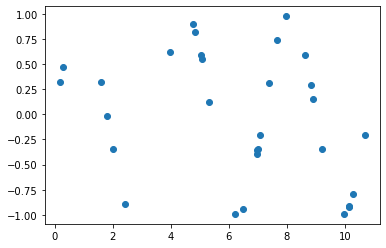

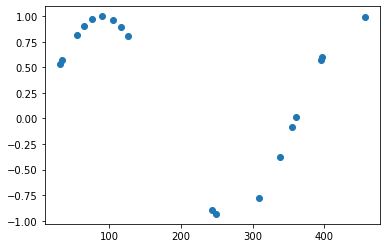

In [3]:
bin1 = np.loadtxt('binaria_eclipsante_1.dat')
bin2 = np.loadtxt('binaria_eclipsante_2.dat')

t1 = bin1[:,0]
b1 = bin1[:,1]
e1 = bin1[:,2]

t2 = bin2[:,0]
b2 = bin2[:,1]
e2 = bin2[:,2]

plt.scatter(t1,b1)
plt.show()
plt.scatter(t2,b2)
plt.show()

In [4]:
def chi_quadrado_sen(observado_y,observado_x,erro,val_inicial,val_final,passos,tolerancia):
    iteracao = 0 # para contar quantas iterações fizemos
    while (2*abs((val_inicial-val_final)/(val_inicial+val_final)) > tolerancia):
        chi2_array = np.zeros(passos) # pré-aloca o espaço para os valores do chi2
        w_range = np.linspace(val_inicial,val_final,passos) # gerando valores de teste para o coeficiente
        for i in range(passos):
            chi2_array[i] = np.sum(((observado_y-np.sin(w_range[i]*observado_x))/erro)**2) # calculando os quadrados dos erros para cada teste do coeficiente
        idx_min = np.argmin(chi2_array) # encontrando a posição do mínimo
        val_inicial,ajuste,val_final = w_range[idx_min-1:idx_min+2] # pegando o valor mínimo e seus vizinhos - atualiza para a prox. iteração
        print('best fit - iter: '+str(iteracao)+' - T = ', 2*np.pi/ajuste)
        iteracao += 1
    return ajuste 

# valores a serem aplicados:
val_final1 = 2*np.pi/4 # chute do máximo -> 4 dias
val_inicial1 = 2*np.pi/2 # chute do mínimo -> 2 dias
val_final2 = 2*np.pi/400 # chute do máximo -> 400 dias
val_inicial2 = 2*np.pi/200 # chute do mínimo -> 200 dias
passos = 40 # numero de passos por iteração
tolerancia = 0.0005 # tolerância da variação entre iterações

#periodo do sistema 1
print('Sistema 1:')
w1 = chi_quadrado_sen(b1,t1,e1,val_inicial1,val_final1,passos,tolerancia)
print('Sistema 2:')
#periodo do sistema 2
w2 = chi_quadrado_sen(b2,t2,e2,val_inicial2,val_final2,passos,tolerancia)


Sistema 1:
best fit - iter: 0 - T =  3.627906976744186
best fit - iter: 1 - T =  3.6
best fit - iter: 2 - T =  3.5998907634421653
Sistema 2:
best fit - iter: 0 - T =  362.7906976744186
best fit - iter: 1 - T =  359.99999999999994
best fit - iter: 2 - T =  360.01092431874724


### b) Baseado na resposta da Amanda

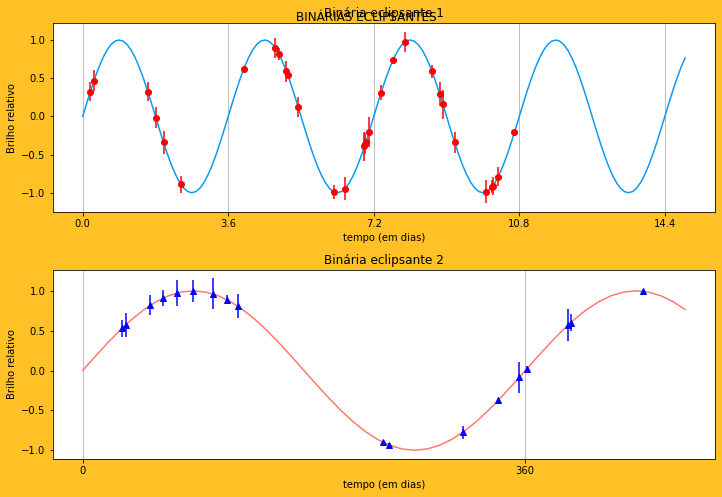

In [17]:
from matplotlib.ticker import MultipleLocator


time1 = np.arange(0,15,0.1)
time2 = np.arange(0,500,10)

plt.figure(facecolor = '#ffc125',figsize=(10,10))
sp1 = plt.subplot(3,1,1)
plt.plot(time1,np.sin(w1*time1),color='xkcd:azure')
plt.errorbar(t1,b1,yerr=e1, fmt = 'ro')
plt.grid(which='major',axis='x')
plt.title('Binária eclipsante 1')
plt.xlabel('tempo (em dias)')
plt.ylabel('Brilho relativo')
sp1.xaxis.set_major_locator(MultipleLocator(2*np.pi/w1))

sp2 = plt.subplot(3,1,2)
plt.plot(time2,np.sin(w2*time2),color='xkcd:salmon')
plt.errorbar(t2,b2,yerr=e2, fmt='b^')
plt.grid(which='major',axis='x')
plt.title('Binária eclipsante 2')
plt.xlabel('tempo (em dias)')
plt.ylabel('Brilho relativo')
sp2.xaxis.set_major_locator(MultipleLocator(2*np.pi/w2))
plt.suptitle('BINÁRIAS ECLIPSANTES')

plt.subplots_adjust(bottom=0.5,top=0.94)
plt.tight_layout()

plt.show()

### c)

In [124]:
def f1(t):
    plot = plt.plot(time1,np.sin(w1*time1+t),color='steelblue')
    plt.show()

interact(f1,t=(-10,30,0.5))

def f2(t):
    plot = plt.plot(time2,np.sin(w2*time2+t),color='crimson')
    plt.show()

interact(f2,t=(-200,1000,50))

interactive(children=(FloatSlider(value=10.0, description='t', max=30.0, min=-10.0, step=0.5), Output()), _dom…

interactive(children=(IntSlider(value=400, description='t', max=1000, min=-200, step=50), Output()), _dom_clas…

<function __main__.f2(t)>

## 2 questão

### a)

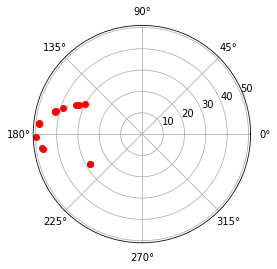

In [19]:
orbita = np.loadtxt("./orbita_de_um_asteroide.dat")
ang = orbita[:,0]
rad = orbita[:,1]
err = orbita[:,2]
plt.polar(ang*np.pi/180,rad,'ro')
plt.show()

### b) Solução da Amanda e Theo

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


a= 26.998400000000014
b= 14.142399999999991


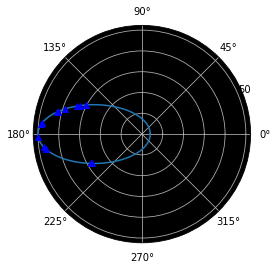

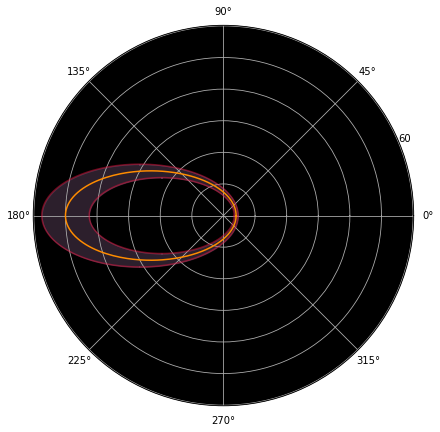

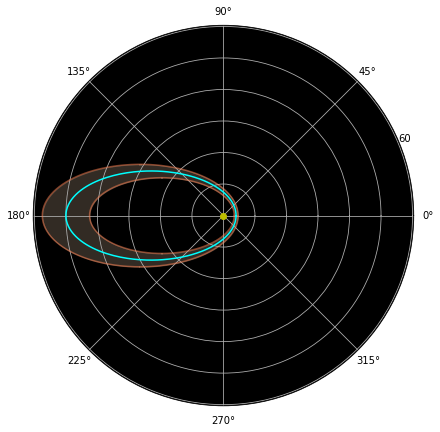

In [24]:
a1 = 50
a2 = 20
a3 = 0
b1 = 40
b2 = 10
b3 = 0
while (2*abs((a1-a2)/(a1+a2))> 0.0005) and (2*abs((b1-b2)/(b1+b2))> 0.0005):
    valores_aprox = []
    valores_a = np.arange(a2,a1,(a1-a2)/10)
    valores_b = np.arange(b2,b1,(b1-b2)/10)
    for i in valores_a:
        for j in valores_b:
            e = np.sqrt(i**2-j**2)/i
            aprox = sum(((rad - i*(1-e**2)/(1+e*np.cos(ang*np.pi/180)))/err)**2)
            valores_aprox.append(aprox)
    for i in range(10):
        for j in range(10):
            if valores_aprox[10*i+j] == min(valores_aprox):
                a3 = valores_a[i]
                a2 = valores_a[i-1]
                a1 = valores_a[i+1]
                b3 = valores_b[j]
                b2 = valores_b[j-1]
                b1 = valores_b[j+1]
print('a=',a3)
print('b=',b3)

#7.c)

def e(a,b):
    return np.sqrt(a**2-b**2)/a 
angle = np.arange(0,2*np.pi,np.pi/180)
plt.polar(angle,a3*(1-e(a3,b3)**2)/(1+e(a3,b3)*np.cos(angle)))
plt.polar(ang*np.pi/180,rad,'b^')
plt.show()

#7.d)

a3min = 0.85*a3
a3max = 1.15*a3
b3min = 0.85*b3
b3max = 1.15*b3

plt.figure(figsize=(7,7))
plt.polar(angle,a3*(1-e(a3,b3)**2)/(1+e(a3,b3)*np.cos(angle)),color='darkorange')
plt.polar(angle,a3min*(1-e(a3min,b3min)**2)/(1+e(a3min,b3min)*np.cos(angle)),color='crimson',alpha=0.5)
plt.polar(angle,a3max*(1-e(a3max,b3max)**2)/(1+e(a3max,b3max)*np.cos(angle)),color='crimson',alpha=0.5)
plt.fill_between(angle,a3min*(1-e(a3min,b3min)**2)/(1+e(a3min,b3min)*np.cos(angle)), a3max*(1-e(a3max,b3max)**2)/(1+e(a3max,b3max)*np.cos(angle)),color='plum',alpha=0.2)
plt.show()

#7.e)

plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize=(7,7))
plt.polar(angle,a3*(1-e(a3,b3)**2)/(1+e(a3,b3)*np.cos(angle)),color='aqua')
plt.polar(0,0,'yo')
plt.polar(angle,a3min*(1-e(a3min,b3min)**2)/(1+e(a3min,b3min)*np.cos(angle)),color='coral',alpha=0.5)
plt.polar(angle,a3max*(1-e(a3max,b3max)**2)/(1+e(a3max,b3max)*np.cos(angle)),color='coral',alpha=0.5)
plt.fill_between(angle,a3min*(1-e(a3min,b3min)**2)/(1+e(a3min,b3min)*np.cos(angle)), a3max*(1-e(a3max,b3max)**2)/(1+e(a3max,b3max)*np.cos(angle)),color='peachpuff',alpha=0.2)
plt.show()

# Lista 4

## 1) Solução da Mariana e Laíza

1° - Carregar o arquivo de cada estrela em um array de três dimensões (3 colunas, comprimento de onda, radiância, erro da radiância)

In [3]:
arquivo = np.array([np.loadtxt("estrelas/estrela_"+str(i)+".txt") for i in range(1,101)])
        
arquivo_comp, arquivo_rad, arquivo_errad = arquivo.T

2° - Estabelecer funções que serão necessárias para a letra b), na qual é necessário determinar a temperatura por meio da Lei de Planck.

In [4]:
h=np.float(6.62607015*10**(-34))
c=np.float(299792458)
e=np.exp(1)
k=np.float(1.380649*10**(-23))
temps = np.zeros([100,2])
def radi(arquivo_comp: float, T: float):
	return ((2*h*(c**2))/(arquivo_comp **5))*(1/(np.exp(1)**((h*c)/(arquivo_comp *k*T))-1))
def chiquadrado(pontos: np.ndarray, T: float):
	x,y,e= pontos.T
	return np.sum(np.power((y-radi(x,T))/e,2))
def melhor_valor(estrela: int, min_i=1000, max_i=50000):
	min_chi= float('inf')
	temp=0
	min_t,max_t=min_i,max_i
	while True:
		ts=[round(i,0) for i in np.linspace(min_t, max_t,20)]
		chi=min_chi
		for t in ts:
			e= chiquadrado(arquivo[estrela-1],t)
			if e<min_chi:
				min_chi, temp= e,t
		if min_chi == chi or min_chi <1.0e-5:
			break
		min_t=ts[list(ts).index(temp)-1]
		if min_t ==ts[-1]:
			min_t=ts[0]
		max_t=ts[list(ts).index(temp)+1]
	return temp

3° - Estabelecer funções referentes à classificação espectral de uma estrela (OBAFGKM) em vista da temperatura encontrada (desconsiderando T<2000K) e referentes ao calculo da temperatura pela lei de Planck. (d)

In [5]:
def classif(T):
    if T >= 33000:
        return 'O'
    elif T >= 10000:
        return 'B'
    elif T >= 7500:
        return 'A'
    elif T >= 6000:
        return 'F'
    elif T >= 5200:
        return 'G'
    elif T >= 3700:
        return 'K'
    else:
        return 'M'

ti = time.time()
tempos = []
for d in range(1, 101):
    i = time.time()
    t = melhor_valor(d)
    cl = classif(t)
    tempos.append({'estrela': d, 'tS': time.time()-i, 'tK': t, 'tipo': cl})
print(f'Tempo total: {time.time()-ti}')
for s in tempos:
    print(s)

Tempo total: 5.547846555709839
{'estrela': 1, 'tS': 0.03792214393615723, 'tK': 3579.0, 'tipo': 'M'}
{'estrela': 2, 'tS': 0.06680464744567871, 'tK': 8845.0, 'tipo': 'A'}
{'estrela': 3, 'tS': 0.0646357536315918, 'tK': 2692.0, 'tipo': 'M'}
{'estrela': 4, 'tS': 0.02480792999267578, 'tK': 3579.0, 'tipo': 'M'}
{'estrela': 5, 'tS': 0.06198883056640625, 'tK': 5631.0, 'tipo': 'G'}
{'estrela': 6, 'tS': 0.0620725154876709, 'tK': 9933.0, 'tipo': 'A'}
{'estrela': 7, 'tS': 0.03730463981628418, 'tK': 10637.0, 'tipo': 'B'}
{'estrela': 8, 'tS': 0.049704551696777344, 'tK': 4568.0, 'tipo': 'K'}
{'estrela': 9, 'tS': 0.06287789344787598, 'tK': 5791.0, 'tipo': 'G'}
{'estrela': 10, 'tS': 0.06220531463623047, 'tK': 9424.0, 'tipo': 'A'}
{'estrela': 11, 'tS': 0.050284385681152344, 'tK': 2404.0, 'tipo': 'M'}
{'estrela': 12, 'tS': 0.05231666564941406, 'tK': 2428.0, 'tipo': 'M'}
{'estrela': 13, 'tS': 0.0622563362121582, 'tK': 8262.0, 'tipo': 'A'}
{'estrela': 14, 'tS': 0.061921119689941406, 'tK': 3128.0, 'tipo': 'M

4°- Estabelecer funções para o cálculo da temperatura por meio da Lei de Wien e posteriormente, calculá-la.

In [6]:
def wien(pontos):
    c, r, e = pontos.T
    pico = c[r.argmax()]
    return 0.0028976 / pico

In [7]:
star = []
for e in range(1, 101):
    star.append({'estrela': e, 'temp': wien(arquivo[e-1])})
    print(star[e-1])

{'estrela': 1, 'temp': 3525.0608272506056}
{'estrela': 2, 'temp': 8834.14634146341}
{'estrela': 3, 'temp': 2692.9368029739753}
{'estrela': 4, 'temp': 3533.6585365853634}
{'estrela': 5, 'temp': 5637.354085603109}
{'estrela': 6, 'temp': 9923.287671232873}
{'estrela': 7, 'temp': 10652.941176470586}
{'estrela': 8, 'temp': 4570.347003154571}
{'estrela': 9, 'temp': 5795.199999999997}
{'estrela': 10, 'temp': 9407.792207792203}
{'estrela': 11, 'temp': 2402.6533996683233}
{'estrela': 12, 'temp': 2426.8006700167484}
{'estrela': 13, 'temp': 8278.85714285714}
{'estrela': 14, 'temp': 3129.1576673866066}
{'estrela': 15, 'temp': 7545.833333333329}
{'estrela': 16, 'temp': 4139.428571428569}
{'estrela': 17, 'temp': 2880.31809145129}
{'estrela': 18, 'temp': 10202.816901408445}
{'estrela': 19, 'temp': 9407.792207792203}
{'estrela': 20, 'temp': 5405.970149253728}
{'estrela': 21, 'temp': 5385.873605947952}
{'estrela': 22, 'temp': 7429.743589743585}
{'estrela': 23, 'temp': 2619.891500904157}
{'estrela': 24,

5° - Criando o arquivo para o cálculo de temperatura de uma estrela e importando argparse.

In [8]:
%%writefile estrelas.py
import numpy as np
import time
import argparse

parser = argparse.ArgumentParser(description='Código que calcula a temperatura da estrela passada para o código')

parser.add_argument('-e', '--estrela', type=int, help='Número da estrela')
args = parser.parse_args()

comp, rad, erro = np.loadtxt(f'./estrelas/estrela_{args.estrela}.txt').T

h = 6.62607015e-34
c = 299792458
k = 1.380649e-23

with open('./tempos.txt', 'a+') as tempos:
    i = time.time()
    minchi = float('inf')
    temp = 0
    mint, maxt = 1000, 50000
    while True:
        ts = [round(i,0) for i in np.linspace(mint,maxt, 20)]
        chi = minchi
        for t in ts:
            e = np.sum(np.power((rad - (((2 * h * (c ** 2))/(comp ** 5)) * (1 / (np.exp(1) ** ((h * c) / (comp * k * t)) - 1)))) / erro, 2))
            if e < minchi:
                minchi, temp = e, t
        if minchi == chi or minchi < 1.0e-5:
            break
        mint = ts[list(ts).index(temp)-1]
        if mint == ts[-1]:
            mint = ts[0]
        maxt = ts[list(ts).index(temp)+1]
    f = time.time()
    linha = f'estrela: {args.estrela}, temperatura: {temp}, tempo: {f-i}\n'
    print(linha[:-2])
    tempos.write(linha)


Writing estrelas.py


6° - Executando em paralelo o cálculo da temperatura de cada estrela por meio do parallel. (e)

Um pouco modificado do código da Mariana e Laíza

In [9]:
ini = time.time()
print('Iniciando análise de dados das estrelas...')
!parallel -j 4 python3 estrelas.py -e -- $(seq 100)
print('Análise finalizada. \nTempo total:', time.time()-ini)

Iniciando análise de dados das estrelas...
/bin/bash: parallel: comando não encontrado
Análise finalizada. 
Tempo total: 0.1476149559020996


7° - Paralelizando por meio do multiprocessamento. (e)

In [10]:
start = time.time()

pool = mp.Pool(processes=4)
results = [{'estrela': x, 'temperatura': pool.apply(melhor_valor, args=(x,))} for x in range(1, 101)]
pool.terminate()
pool.join()

end = time.time()
print(end-start)

for e in results:
    print(e)

6.074063777923584
{'estrela': 1, 'temperatura': 3579.0}
{'estrela': 2, 'temperatura': 8845.0}
{'estrela': 3, 'temperatura': 2692.0}
{'estrela': 4, 'temperatura': 3579.0}
{'estrela': 5, 'temperatura': 5631.0}
{'estrela': 6, 'temperatura': 9933.0}
{'estrela': 7, 'temperatura': 10637.0}
{'estrela': 8, 'temperatura': 4568.0}
{'estrela': 9, 'temperatura': 5791.0}
{'estrela': 10, 'temperatura': 9424.0}
{'estrela': 11, 'temperatura': 2404.0}
{'estrela': 12, 'temperatura': 2428.0}
{'estrela': 13, 'temperatura': 8262.0}
{'estrela': 14, 'temperatura': 3128.0}
{'estrela': 15, 'temperatura': 7543.0}
{'estrela': 16, 'temperatura': 4140.0}
{'estrela': 17, 'temperatura': 2878.0}
{'estrela': 18, 'temperatura': 10205.0}
{'estrela': 19, 'temperatura': 9381.0}
{'estrela': 20, 'temperatura': 5397.0}
{'estrela': 21, 'temperatura': 5381.0}
{'estrela': 22, 'temperatura': 7429.0}
{'estrela': 23, 'temperatura': 2618.0}
{'estrela': 24, 'temperatura': 6075.0}
{'estrela': 25, 'temperatura': 4029.0}
{'estrela': 26

# 2) Solução da Mariana e Laíza

## Sem paralelização

Binárias

In [42]:
def omega(T):
    return 2*np.pi/T

def erro_total(pontos, T):
    t, b, e = pontos.T
    return np.sum(np.power((b - np.sin(omega(T)*t))/e, 2))

def sumdif(a, b):
    return a + b, a - b

def melhor_w(pontos, mini, maxi, passi):
    mine = float('inf')
    T = 0
    mint, maxt, passo = mini, maxi, passi
    arredonda = 0
    while True:
        ts = [round(i, arredonda) for i in np.arange(mint, maxt, passo)]
        er = mine
        for t in ts:
            e = erro_total(pontos, t)
            if e < mine:
                mine, T = e, t
        if mine == er:
            break
        maxt, mint = sumdif(T, passo)
        passo /= 10
        maxt += passo
        arredonda += 1
    return omega(T)

In [45]:
i1 = time.time()
bin1 = np.loadtxt('binaria_eclipsante_1.dat')
w1 = melhor_w(bin1, 1, 5, 1)
fi = time.time()
bin2 = np.loadtxt('binaria_eclipsante_2.dat')
w2 = melhor_w(bin2, 1, 500, 10)
f2 = time.time()

print(f'Tempo binária 1: {fi-i1}\nTempo binária 2: {f2-fi}')
print(f'Tempo total binárias: {f2-i1}')

Tempo binária 1: 0.002991199493408203
Tempo binária 2: 0.0033371448516845703
Tempo total binárias: 0.0063283443450927734


Asteroide

In [48]:
def e(a, b):
    return (np.sqrt(np.power(a, 2) - np.power(b, 2)))/a

def elipse(a, b, ang):
    cima = a * (1 - np.power(e(a, b), 2))
    baixo = 1 + e(a, b)*np.cos(ang)
    return cima/baixo

def erro_elipse(pontos, a, b):
    theta, raio, erro = pontos.T
    theta = np.radians(theta)
    return np.sum(np.power((raio - elipse(a, b, theta))/erro, 2))

In [50]:
ini = time.time()
orb = np.loadtxt('orbita_de_um_asteroide.dat')
maxa, mina = 40, 20
maxb, minb = 20, 10
mela, melb = 0, 0
mine = float('inf')
passo, arredonda = 1, 1

while True:
    alla = [round(i, arredonda) for i in np.arange(mina, maxa, passo)]
    allb = [round(j, arredonda) for j in np.arange(minb, maxb, passo)]
    err = mine
    for a in alla:
        for b in allb:
            er = erro_elipse(orb, a, b)
            if er < mine:
                mela, melb, mine = a, b, er
    if mine == err:
        break
    maxa, mina = sumdif(mela, passo)
    maxb, minb = sumdif(melb, passo)
    passo /= 10
    arredonda += 1
    maxa, maxb = maxa+passo, maxb+passo
fim = time.time()

print(f'Tempo órbita: {fim-ini}')

Tempo órbita: 0.10702276229858398


## Só multiprocessing síncrono

In [51]:
def melhor_w(pontos, mini, maxi, passi):
    mine = float('inf')
    T = 0
    mint, maxt, passo = mini, maxi, passi
    arredonda = 0
    while True:
        ts = [round(i, arredonda) for i in np.arange(mint, maxt, passo)]
        er = mine
        pool = mp.Pool(processes=4)
        erros = [(t, pool.apply(erro_total, args=(pontos, t,))) for t in ts]
        pool.terminate()
        pool.join()
        T, mine = min(erros, key=lambda x: x[1])
        if mine == er:
            break
        maxt, mint = sumdif(T, passo)
        passo /= 10
        maxt += passo
        arredonda += 1
    return omega(T)

In [52]:
i1 = time.time()
bin1 = np.loadtxt('binaria_eclipsante_1.dat')
w1 = melhor_w(bin1, 1, 5, 1)
fi = time.time()
bin2 = np.loadtxt('binaria_eclipsante_2.dat')
w2 = melhor_w(bin2, 1, 500, 10)
f2 = time.time()

print(f'Tempo binária 1: {fi-i1}\nTempo binária 2: {f2-fi}')

Tempo binária 1: 0.3595004081726074
Tempo binária 2: 0.3601841926574707


In [53]:
ini = time.time()
orb = np.loadtxt('orbita_de_um_asteroide.dat')
maxa, mina = 40, 20
maxb, minb = 20, 10
mela, melb = 0, 0
mine = float('inf')
passo, arredonda = 1, 1

while True:
    alla = [round(i, arredonda) for i in np.arange(mina, maxa, passo)]
    allb = [round(j, arredonda) for j in np.arange(minb, maxb, passo)]
    err = mine
    pool = mp.Pool(processes=4)
    erros = [(a, b, pool.apply(erro_elipse, args=(orb, a, b,))) for a in alla for b in allb]
    pool.terminate()
    pool.join()
    mela, melb, mine = min(erros, key=lambda x: x[2])
    if mine == err:
        break
    maxa, mina = sumdif(mela, passo)
    maxb, minb = sumdif(melb, passo)
    passo /= 10
    arredonda += 1
    maxa, maxb = maxa+passo, maxb+passo
fim = time.time()

print(f'Tempo órbita: {fim-ini}')

Tempo órbita: 1.216536283493042


## Só multiprocessing assíncrono

In [55]:
def melhor_w(pontos, mini, maxi, passi):
    mine = float('inf')
    T = 0
    mint, maxt, passo = mini, maxi, passi
    arredonda = 0
    while True:
        ts = [round(i, arredonda) for i in np.arange(mint, maxt, passo)]
        er = mine
        pool = mp.Pool(processes=4)
        erros = [(t, pool.apply_async(erro_total, args=(pontos, t,))) for t in ts]
        output = [(t, p.get()) for t, p in erros]
        T, mine = min(output, key=lambda x: x[1])
        if mine == er:
            break
        maxt, mint = sumdif(T, passo)
        passo /= 10
        maxt += passo
        arredonda += 1
    return omega(T)

In [57]:
i1 = time.time()
bin1 = np.loadtxt('binaria_eclipsante_1.dat')
w1 = melhor_w(bin1, 1, 5, 1)
fi = time.time()
bin2 = np.loadtxt('binaria_eclipsante_2.dat')
w2 = melhor_w(bin2, 1, 500, 10)
f2 = time.time()

print(f'Tempo binária 1: {fi-i1}\nTempo binária 2: {f2-fi}')

Tempo binária 1: 0.05945014953613281
Tempo binária 2: 0.0646977424621582


In [58]:
ini = time.time()
orb = np.loadtxt('orbita_de_um_asteroide.dat')
maxa, mina = 40, 20
maxb, minb = 20, 10
mela, melb = 0, 0
mine = float('inf')
passo, arredonda = 1, 1

while True:
    alla = [round(i, arredonda) for i in np.arange(mina, maxa, passo)]
    allb = [round(j, arredonda) for j in np.arange(minb, maxb, passo)]
    err = mine
    pool = mp.Pool(processes=4)
    erros = [(a, b, pool.apply_async(erro_elipse, args=(orb, a, b,))) for a in alla for b in allb]
    output = [(a, b, p.get()) for a, b, p in erros]
    mela, melb, mine = min(output, key=lambda x: x[2])
    if mine == err:
        break
    maxa, mina = sumdif(mela, passo)
    maxb, minb = sumdif(melb, passo)
    passo /= 10
    arredonda += 1
    maxa, maxb = maxa+passo, maxb+passo
fim = time.time()

print(f'Tempo órbita: {fim-ini}')

Tempo órbita: 0.3169984817504883


## Só pymp

In [59]:
def melhor_w(pontos, mini, maxi, passi):
    mine = float('inf')
    T = 0
    mint, maxt, passo = mini, maxi, passi
    arredonda = 0
    while True:
        ts = [round(i, arredonda) for i in np.arange(mint, maxt, passo)]
        erros = pymp.shared.array(len(ts,), dtype='float64')
        with pymp.Parallel(4) as p:
            for i in p.range(0, len(erros)):
                erros[i] = erro_total(pontos, ts[i])
        er = mine
        mine, T = min(erros), ts[erros.argmin()]
        if mine == er:
            break
        maxt, mint = sumdif(T, passo)
        passo /= 10
        maxt += passo
        arredonda += 1
    return omega(T)

In [69]:
i1 = time.time()
bin1 = np.loadtxt('binaria_eclipsante_1.dat')
w1 = melhor_w(bin1, 1, 5, 1)
fi = time.time()
bin2 = np.loadtxt('binaria_eclipsante_2.dat')
w2 = melhor_w(bin2, 1, 500, 10)
f2 = time.time()

print(f'Tempo binária 1: {fi-i1}\nTempo binária 2: {f2-fi}')
print(2*np.pi/w1)
print(2*np.pi/w2)

Tempo binária 1: 0.12218666076660156
Tempo binária 2: 0.12941884994506836
3.6
360.0


In [62]:
ini = time.time()
orb = np.loadtxt('orbita_de_um_asteroide.dat')
maxa, mina = 40, 20
maxb, minb = 20, 10
mela, melb = 0, 0
mine = float('inf')
passo, arredonda = 1, 1

while True:
    alla = [round(i, arredonda) for i in np.arange(mina, maxa, passo)]
    allb = [round(j, arredonda) for j in np.arange(minb, maxb, passo)]
    err = mine
    erros = [pymp.shared.array(len(allb), dtype='float64') for i in range(len(alla))]
    for i,a in enumerate(alla):
        with pymp.Parallel(4) as p:
            for j in p.range(0,len(allb)):
                erros[i][j] = erro_elipse(orb,a, allb[j])
    for i,ea in enumerate(erros):
        m = min(ea)
        if m < mine:
            mela, melb, mine = alla[i], allb[list(ea).index(m)], m
    if mine == err:
        break
    maxa, mina = sumdif(mela, passo)
    maxb, minb = sumdif(melb, passo)
    passo /= 10
    arredonda += 1
    maxa, maxb = maxa+passo, maxb+passo
fim = time.time()

print(f'Tempo órbita: {fim-ini}')

Tempo órbita: 4.329250335693359


## Multiprocessing síncrono e pymp

In [63]:
ini = time.time()
orb = np.loadtxt('orbita_de_um_asteroide.dat')
maxa, mina = 40, 20
maxb, minb = 20, 10
mela, melb = 0, 0
mine = float('inf')
passo, arredonda = 1, 1
def pympb(i):
    with pymp.Parallel(4) as p:
        for j in p.range(0,len(allb)):
            erros[i][j] = erro_elipse(orb,alla[i], allb[j])

while True:
    alla = [round(i, arredonda) for i in np.arange(mina, maxa, passo)]
    allb = [round(j, arredonda) for j in np.arange(minb, maxb, passo)]
    err = mine
    erros = [pymp.shared.array(len(allb), dtype='float64') for i in range(len(alla))]
    pool = mp.Pool(processes=4)
    pool.map(pympb, range(0,len(alla)))
    pool.terminate()
    pool.join()
    for i,ea in enumerate(erros):
        m = min(ea)
        if m < mine:
            mela, melb, mine = alla[i], allb[list(ea).index(m)], m
    if mine == err:
        break
    maxa, mina = sumdif(mela, passo)
    maxb, minb = sumdif(melb, passo)
    passo /= 10
    arredonda += 1
    maxa, maxb = maxa+passo, maxb+passo
fim = time.time()

print(f'Tempo órbita: {fim-ini}')

Tempo órbita: 1.764214277267456


# Acrescentada com relação as soluções da Mariana e Laíza

In [81]:
i1 = time.time()
bins = [np.loadtxt('binaria_eclipsante_1.dat'),np.loadtxt('binaria_eclipsante_2.dat')]
mins = [1,1]
maxs = [5,500]
passis = [1,10] 

def melhor_w_multiparallel(binN):
    return melhor_w(bins[binN], mins[binN], maxs[binN], passis[binN])

start = time.time()
pool = mp.Pool(processes=2)
ws = pool.map(melhor_w_multiparallel, range(0,2))
pool.terminate()
pool.join()
end = time.time()
print('tempo total=',end-start)
print('periodos aproximados = ',np.array([2*np.pi,2*np.pi])/np.array(ws))


tempo total= 0.11454343795776367
periodos aproximados =  [  3.6 360. ]
